In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('data/attacks_limpio.csv') #Incluir encoding='latin-1'o UTF-8/16 para que pueda abrir el archivo
print(data.shape) # ver cuantas filas/columnas tiene el archivo
data.head()

(5341, 22)


,Unnamed: 0,Case Number,Date,Year,Time,Day,Month,Year2,Decade,Seasonality,...,Location,Type,Activity,Injury,Fatal (Y/N),Species,Name,Sex,Age,Age Category
0,0,2018.06.25,25-Jun-2018,2018.0,18h00,25,6,2018,2015,Summer,...,"Oceanside, San Diego County",Boating,Paddling,Injury,N,White shark,Julie Wolfe,F,57,Adults
1,1,2018.06.18,18-Jun-2018,2018.0,14h00 -15h00,18,6,2018,2015,Summer,...,"St. Simon Island, Glynn County",Unprovoked,Standing,Injury,N,Unknown,Adyson McNeely,F,11,Teens
2,2,2018.06.09,09-Jun-2018,2018.0,07h45,9,6,2018,2015,Summer,...,"Habush, Oahu",Invalid,Surfing,Injury,N,Unknown,John Denges,M,48,Adults
3,3,2018.06.08,08-Jun-2018,2018.0,Notime,8,6,2018,2015,Summer,...,Arrawarra Headland,Unprovoked,Surfing,Injury,N,2 m shark,male,M,0,Unknown
4,4,2018.06.04,04-Jun-2018,2018.0,Notime,4,6,2018,2015,Summer,...,La Ticla,Provoked,Free diving,Injury,N,"Tiger shark, 3m",Gustavo Ramos,M,0,Unknown


In [3]:
data.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Time', 'Day', 'Month',
       'Year2', 'Decade', 'Seasonality', 'Country', 'Area', 'Location', 'Type',
       'Activity', 'Injury', 'Fatal (Y/N)', 'Species', 'Name', 'Sex', 'Age',
       'Age Category'],
      dtype='object')

In [4]:
def fatality(value):
    if value == "N":
        return "0" 
    elif value == "Y":
        return "1"
    else:
        return "0"

data["Fatal(%)"] = data["Fatal (Y/N)"].apply(fatality)
data["Fatal(%)"]=data["Fatal(%)"].astype("int")
data["Fatal(%)"].value_counts()

0    4287
1    1054
Name: Fatal(%), dtype: int64

In [5]:
data.groupby(["Seasonality","Decade"]).agg({"Fatal(%)":"mean"})

Fatal(%)
Seasonality Decade          
Autumn      1970    0.317972
            1975    0.060606
            1980    0.055556
            1985    0.111111
            1990    0.157143
            1995    0.104478
            2000    0.104839
            2005    0.064516
            2010    0.111888
            2015    0.052632
Spring      1970    0.308068
            1975    0.074074
            1980    0.189189
            1985    0.151515
            1990    0.119048
            1995    0.200000
            2000    0.090000
            2005    0.096774
            2010    0.075630
            2015    0.083333
Summer      1970    0.320273
            1975    0.140000
            1980    0.111111
            1985    0.023256
            1990    0.194444
            1995    0.132653
            2000    0.041667
            2005    0.061350
            2010    0.085227
            2015    0.016667
Unknown     1970    0.371025
            1975    0.400000
            1980    0.222222
            1985    0.142857
            1990    0.000000
            1995    0.166667
            2000    0.000000
            2005    0.000000
            2015    0.000000
Winter      1970    0.343590
            1975    0.235294
            1980    0.166667
            1985    0.073171
            1990    0.153846
            1995    0.181818
            2000    0.133333
            2005    0.108696
            2010    0.110236
            2015    0.070707

Fatal(%)     
                  mean  sum
Age Category               
Adults        0.151732  127
Elderly       0.296296   16
Teens         0.179254  197
Unknown       0.232411  479
Young         0.182171  235

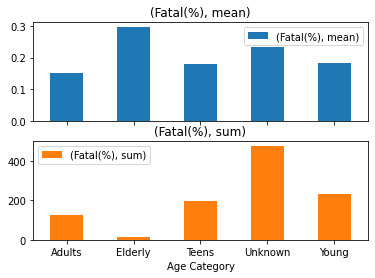

In [6]:
age_fatal=data.groupby("Age Category").agg({"Fatal(%)":["mean","sum"]})
age_fatal.plot.bar(rot=0, subplots=True)
age_fatal

,Fatal(%)
Seasonality,
Winter,273
Summer,262
Autumn,210
Spring,198
Unknown,111


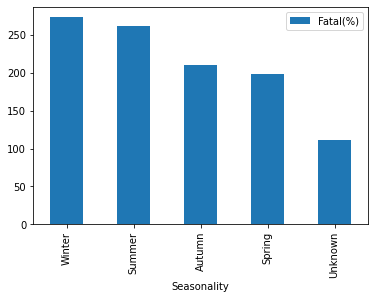

In [7]:
season_fatal=data.groupby('Seasonality').agg({'Fatal(%)':'sum'})
s_plot=season_fatal.sort_values("Fatal(%)",ascending=False).head(20)
s_plot.plot.bar()
s_plot

,Fatal(%)
Country,
Australia,263
Usa,168
South Africa,104
Papua New Guinea,46
Mexico,34
Brazil,28
New Zealand,22
Reunion,21
Cuba,20


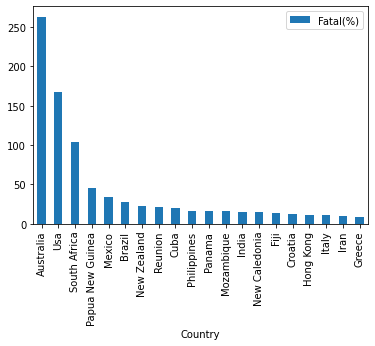

In [8]:
country_fatal=data.groupby('Country').agg({'Fatal(%)':'sum'})
cf_plot=country_fatal.sort_values("Fatal(%)",ascending=False).head(20)
cf_plot.plot.bar()
cf_plot

In [9]:
#calcular probabilidad de sobrevivir de una mujer y un hombre 
#crear una nueva columna en relacion a : columna Sex (h/m) y columna fatal sea 1

def fatality_f(rowSeries):
    if rowSeries["Fatal(%)"]==1 and rowSeries["Sex"]=="F":
        return 1
    elif rowSeries["Fatal(%)"]==0 and rowSeries["Sex"]=="F":
        return 0
    else:
        return 0
data["Fatality female"] = data[["Fatal(%)","Sex"]].apply(fatality_f, axis=1)

In [10]:
data["Fatality female"].value_counts()

0    5247
1      94
Name: Fatality female, dtype: int64

In [11]:
def fatality_m(rowSeries):
    if rowSeries["Fatal(%)"]==1 and rowSeries["Sex"]=="M":
        return 1
    elif rowSeries["Fatal(%)"]==0 and rowSeries["Sex"]=="M":
        return 0
    else:
        return 0
data["Fatality male"] = data[["Fatal(%)","Sex"]].apply(fatality_m, axis=1)

In [12]:
data["Fatality male"].value_counts()

0    4398
1     943
Name: Fatality male, dtype: int64

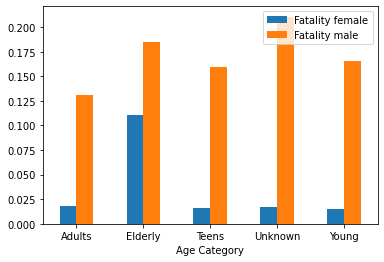

In [13]:
data.groupby("Age Category").agg({
        "Fatality female":"mean", 
        "Fatality male":"mean"
}).plot.bar(rot=0)

In [14]:
def fatality_teens(row):
    if row["Fatal(%)"]==1 and row["Age Category"]=="Teens":
        return 1
    elif row["Fatal(%)"]==0 and row["Age Category"]=="Teens":
        return 0
    else:
        return 0
data["Fatality teens"] = data[["Fatal(%)","Age Category"]].apply(fatality_teens, axis=1)

In [15]:
data["Fatality teens"].value_counts()

0    5144
1     197
Name: Fatality teens, dtype: int64

In [16]:
def fatality_young(row):
    if row["Fatal(%)"]==1 and row["Age Category"]=="Young":
        return 1
    elif row["Fatal(%)"]==0 and row["Age Category"]=="Young":
        return 0
    else:
        return 0
data["Fatality young"] = data[["Fatal(%)","Age Category"]].apply(fatality_young, axis=1)

In [17]:
data["Fatality young"].value_counts()

0    5106
1     235
Name: Fatality young, dtype: int64

In [18]:
def fatality_adults(row):
    if row["Fatal(%)"]==1 and row["Age Category"]=="Adults":
        return 1
    elif row["Fatal(%)"]==0 and row["Age Category"]=="Adults":
        return 0
    else:
        return 0
data["Fatality adults"] = data[["Fatal(%)","Age Category"]].apply(fatality_adults, axis=1)
data["Fatality adults"].value_counts()

0    5214
1     127
Name: Fatality adults, dtype: int64

In [19]:
def fatality_elderly(row):
    if row["Fatal(%)"]==1 and row["Age Category"]=="Elderly":
        return 1
    elif row["Fatal(%)"]==0 and row["Age Category"]=="Elderly":
        return 0
    else:
        return 0
data["Fatality elderly"] = data[["Fatal(%)","Age Category"]].apply(fatality_elderly, axis=1)
data["Fatality elderly"].value_counts()

0    5325
1      16
Name: Fatality elderly, dtype: int64

In [20]:
def fatality_summer(row):
    if row["Fatal(%)"]==1 and row["Seasonality"]=="Summer":
        return 1
    elif row["Fatal(%)"]==0 and row["Seasonality"]=="Summer":
        return 0
    else:
        return 0
data["Fatality summer"] = data[["Fatal(%)","Seasonality"]].apply(fatality_summer, axis=1)
data["Fatality summer"].value_counts()

0    5079
1     262
Name: Fatality summer, dtype: int64

In [21]:
def fatality_autumn(row):
    if row["Fatal(%)"]==1 and row["Seasonality"]=="Autumn":
        return 1
    elif row["Fatal(%)"]==0 and row["Seasonality"]=="Autumn":
        return 0
    else:
        return 0
data["Fatality autumn"] = data[["Fatal(%)","Seasonality"]].apply(fatality_autumn, axis=1)
data["Fatality autumn"].value_counts()

0    5131
1     210
Name: Fatality autumn, dtype: int64

In [22]:
def fatality_winter(row):
    if row["Fatal(%)"]==1 and row["Seasonality"]=="Winter":
        return 1
    elif row["Fatal(%)"]==0 and row["Seasonality"]=="Winter":
        return 0
    else:
        return 0
data["Fatality winter"] = data[["Fatal(%)","Seasonality"]].apply(fatality_winter, axis=1)
data["Fatality winter"].value_counts()

0    5068
1     273
Name: Fatality winter, dtype: int64

In [23]:
def fatality_spring(row):
    if row["Fatal(%)"]==1 and row["Seasonality"]=="Spring":
        return 1
    elif row["Fatal(%)"]==0 and row["Seasonality"]=="Spring":
        return 0
    else:
        return 0
data["Fatality spring"] = data[["Fatal(%)","Seasonality"]].apply(fatality_spring, axis=1)
data["Fatality spring"].value_counts()

0    5143
1     198
Name: Fatality spring, dtype: int64

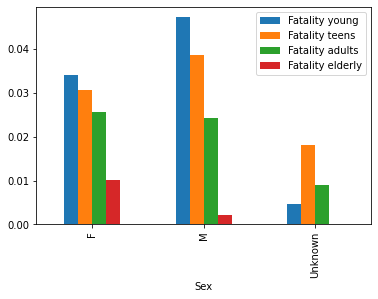

In [24]:
data.groupby("Sex").agg({
        "Fatality young":"mean", 
        "Fatality teens":"mean",
        "Fatality adults":"mean",
        "Fatality elderly":"mean",
}).plot.bar()

In [25]:
data.columns

Index(['Unnamed: 0', 'Case Number', 'Date', 'Year', 'Time', 'Day', 'Month',
       'Year2', 'Decade', 'Seasonality', 'Country', 'Area', 'Location', 'Type',
       'Activity', 'Injury', 'Fatal (Y/N)', 'Species', 'Name', 'Sex', 'Age',
       'Age Category', 'Fatal(%)', 'Fatality female', 'Fatality male',
       'Fatality teens', 'Fatality young', 'Fatality adults',
       'Fatality elderly', 'Fatality summer', 'Fatality autumn',
       'Fatality winter', 'Fatality spring'],
      dtype='object')

In [26]:
#numero total de atacados
totalnumber_attacks=data["Name"].count()
totalnumber_attacks

5341

In [27]:
#numero total de muertos
totalnumber_fatal=(data["Fatal (Y/N)"]=="Y").sum()
totalnumber_fatal

1054

In [28]:
#Porcetaje de atacados que mueren
fatal_attack_percent=round((totalnumber_fatal/totalnumber_attacks)*100,2)
fatal_attack_percent

19.73

In [29]:
#Numero de atacados por sexo

totalnumber_female=(data["Sex"]=="F").sum()
totalnumber_male=(data["Sex"]=="M").sum()
attack_female_percent=round((totalnumber_female/totalnumber_attacks)*100,2)
attack_male_percent=round((totalnumber_male/totalnumber_attacks)*100,2)
attack_female_percent,attack_male_percent

(10.99, 84.89)

In [30]:
#Numero de muertos por sexo
fatal_female=(data["Fatality female"]==1).sum()
fatal_male=(data["Fatality male"]==1).sum()
fatal_female_percent=round((fatal_female/totalnumber_fatal)*100,2)
fatal_male_percent=round((fatal_male/totalnumber_fatal)*100,2)
fatal_female_percent,fatal_male_percent

(8.92, 89.47)

In [31]:
#Probabilidad de morir de un atacado por sexo
female_prob_fatal=round((fatal_female/totalnumber_female)*100,2)
male_prob_fatal=round((fatal_male/totalnumber_male)*100,2)
female_prob_fatal,male_prob_fatal

(16.01, 20.8)

In [32]:
# Numero de atacados por edad
totalnumber_teens=(data["Age Category"]=="Teens").sum()
totalnumber_young=(data["Age Category"]=="Young").sum()
totalnumber_adult=(data["Age Category"]=="Adults").sum()
totalnumber_elderly=(data["Age Category"]=="Elderly").sum()
attack_teens_percent=round((totalnumber_teens/totalnumber_attacks)*100,2)
attack_young_percent=round((totalnumber_young/totalnumber_attacks)*100,2)
attack_adult_percent=round((totalnumber_adult/totalnumber_attacks)*100,2)
attack_elderly_percent=round((totalnumber_elderly/totalnumber_attacks)*100,2)
print(attack_teens_percent,attack_young_percent,attack_adult_percent,attack_elderly_percent)

#Numero de muertos por edad
fatal_teens=(data["Fatality teens"]==1).sum()
fatal_young=(data["Fatality young"]==1).sum()
fatal_adult=(data["Fatality adults"]==1).sum()
fatal_elderly=(data["Fatality elderly"]==1).sum()
fatal_teens_percent=round((fatal_teens/totalnumber_fatal)*100,2)
fatal_young_percent=round((fatal_young/totalnumber_fatal)*100,2)
fatal_adult_percent=round((fatal_adult/totalnumber_fatal)*100,2)
fatal_elderly_percent=round((fatal_elderly/totalnumber_fatal)*100,2)
print(fatal_teens_percent,fatal_young_percent,fatal_adult_percent,fatal_elderly_percent)

#Probabilidad de morir de un atacado por edad
teens_prob_fatal=round((fatal_teens/totalnumber_teens)*100,2)
young_prob_fatal=round((fatal_young/totalnumber_young)*100,2)
adult_prob_fatal=round((fatal_adult/totalnumber_adult)*100,2)
elderly_prob_fatal=round((fatal_elderly/totalnumber_elderly)*100,2)
print(teens_prob_fatal,young_prob_fatal,adult_prob_fatal,elderly_prob_fatal)


20.58 24.15 15.67 1.01
18.69 22.3 12.05 1.52
17.93 18.22 15.17 29.63


In [41]:
data["Activity"].value_counts().head(20)

Surfing            1225
Fishing            1075
Swimming           1027
Unknown             158
Wading              146
Bathing             143
Diving              101
Standing             98
Snorkeling           84
Scuba diving         75
Body boarding        60
Kayaking             33
Treading water       32
Boogie boarding      29
Free diving          27
Pearl diving         20
Walking              17
Boogie Boarding      16
Floating             14
Fell overboard       14
Name: Activity, dtype: int64

,Fatal(%)
Activity,
Swimming,367
Fishing,139
Surfing,70
Bathing,60
Unknown,27
Diving,17
Standing,16
Body boarding,14
Scuba diving,13


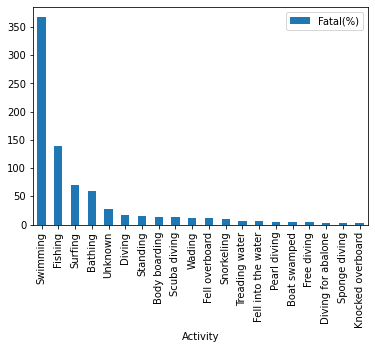

In [51]:
activity_fatal=data.groupby('Activity').agg({'Fatal(%)':"sum"})
af_plot=activity_fatal.sort_values("Fatal(%)",ascending=False).head(20)
af_plot.plot.bar()
af_plot

In [ ]:
marcas_caras = ["Audi","Mercedes","Ferrari"]
data["Surfing Fatal"] = np.where((data["Activity"]=="Surfing"),(data["Fatal(%)"]==1), True, False)